 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns

csvpath = Path("whale_returns.csv")
whale = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)

whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
whale.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
csvpath = Path("algo_returns.csv")
returns = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)

returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
returns=returns.dropna()

In [9]:
returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
csvpath = Path("sp500_history.csv")
sp500 = pd.read_csv(csvpath,index_col="Date",infer_datetime_format=True,parse_dates=True)

sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Fix Data Types
sp500['Close']=sp500['Close'].str.replace("$","")
sp500['Close'] = sp500['Close'].astype('float')

C:\Users\kgluckyme\AppData\Local\Temp\ipykernel_32\2812078581.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500['Close']=sp500['Close'].str.replace("$","")


In [12]:
# Check Data Types
sp500.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sp500pct=sp500.pct_change()

In [14]:
# Drop nulls
sp500pct=sp500pct.dropna()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500pct.rename(columns={'Close':'sp500'},inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
allr=pd.concat([whale,sp500pct,returns],axis="columns",join="inner")
allr.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.004559,-0.008158,0.003200
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

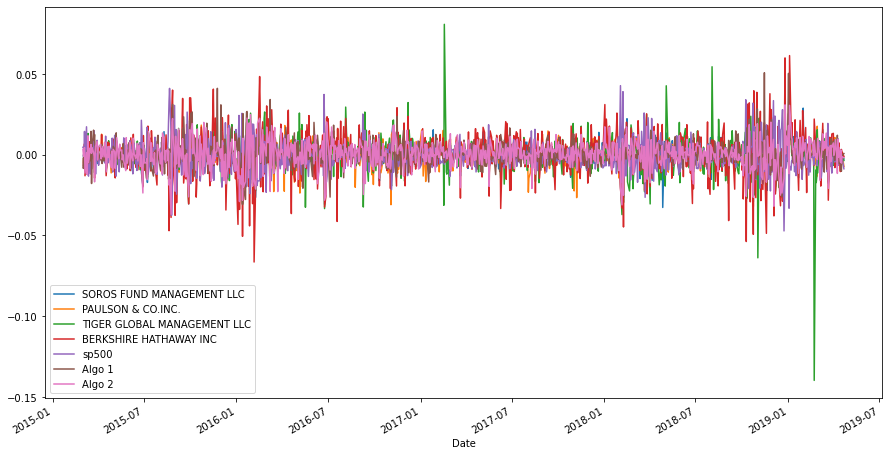

In [17]:
# Plot daily returns of all portfolios
allr.plot(figsize=(15,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

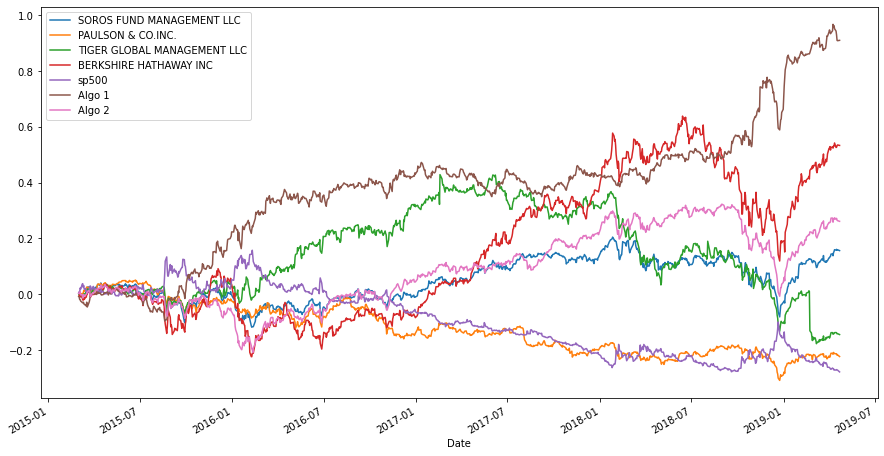

In [18]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cumr = (1+allr).cumprod() -1
cumr.plot(figsize=(15,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

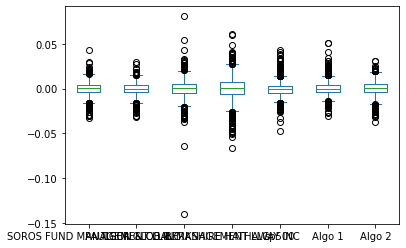

In [19]:
# Box plot to visually show risk
allr.plot.box()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
allr.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
sp500                          0.008584
Algo 1                         0.007624
Algo 2                         0.008338
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
allr["sp500"].std()
# Determine which portfolios are riskier than the S&P 500
allr.std()>allr["sp500"].std()

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
sp500                          False
Algo 1                         False
Algo 2                         False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
allr.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
sp500                          0.136268
Algo 1                         0.121026
Algo 2                         0.132357
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

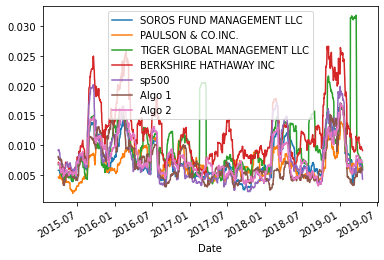

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
allrstd=allr.rolling(window=21).std()
# Plot the rolling standard deviation
allrstd.plot()

### Calculate and plot the correlation

<AxesSubplot:>

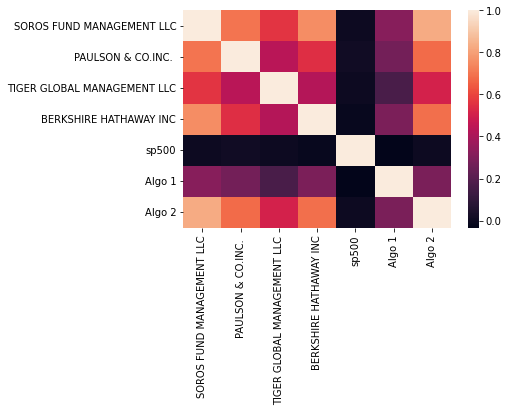

In [24]:
# Calculate the correlation
allrcorr=allr.corr()
# Display de correlation matrix
sns.heatmap(allrcorr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of total'}, xlabel='Date'>

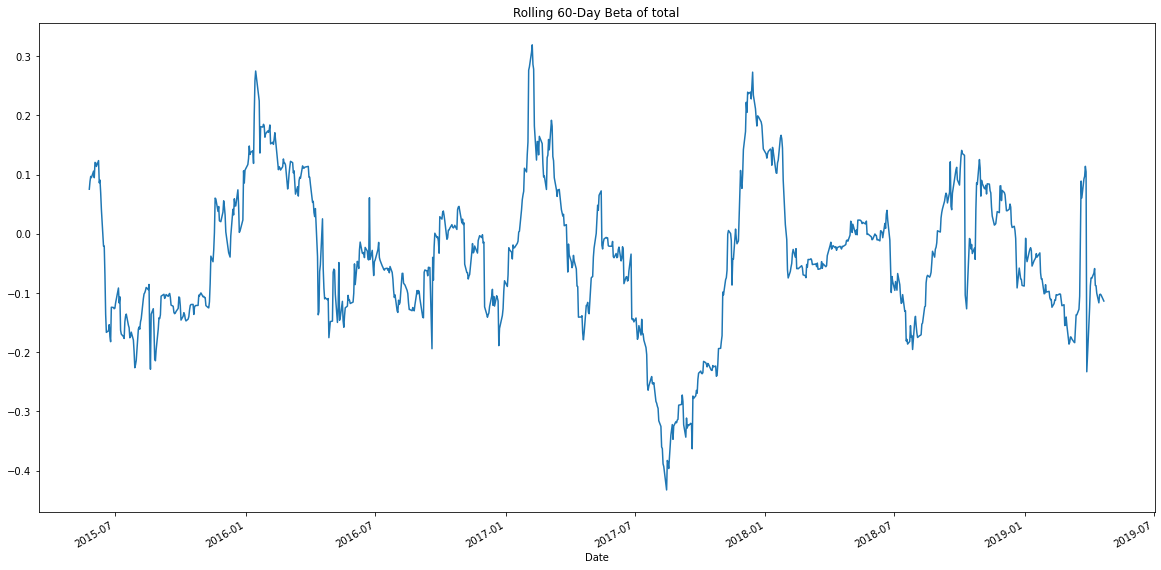

In [25]:
# Calculate covariance of a single portfolio
rolling_covariance = allr['Algo 1'].rolling(window=60).cov(allr['sp500'])
# Calculate variance of S&P 500
rolling_variance = allr['sp500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta tren
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of total') 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
allr.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,0.000107,0.004395,0.002934
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.003305,0.003724,0.002197
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.006590,0.004036,0.002271
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.007159,0.003466,0.006589
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.007823,0.006880,0.008065
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.007721,0.006922,0.007938
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007595,0.007097,0.007896


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
allr_sharp = (allr.mean() * 252) / (allr.std() * np.sqrt(252))

<AxesSubplot:>

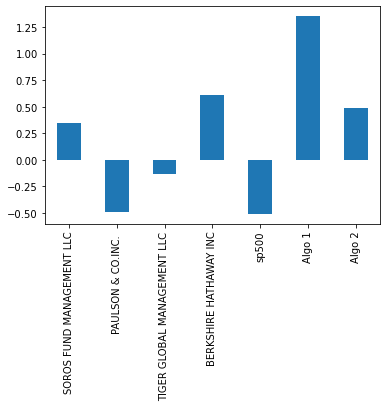

In [28]:
# Visualize the sharpe ratios as a bar plot
allr_sharp.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here! The algorithm did better because of Algo 1

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
csvpath = Path("aapl_historical.csv")
aapl = pd.read_csv(csvpath,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)

aapl.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [30]:
# Reading data from 2nd stock
csvpath = Path("cost_historical.csv")
cost = pd.read_csv(csvpath,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)

cost.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [31]:
# Reading data from 3rd stock
csvpath = Path("goog_historical.csv")
goog = pd.read_csv(csvpath,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)

goog.index

DatetimeIndex(['2019-05-09', '2019-05-08', '2019-05-07', '2019-05-06',
               '2019-05-03', '2019-05-02', '2019-05-01', '2019-04-30',
               '2019-04-29', '2019-04-26',
               ...
               '2018-05-24', '2018-05-23', '2018-05-22', '2018-05-21',
               '2018-05-18', '2018-05-17', '2018-05-16', '2018-05-15',
               '2018-05-14', '2018-05-11'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [32]:
# Combine all stocks in a single DataFrame
all3=pd.concat([aapl,cost,goog])
all3.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [33]:
# Reset Date index
all3.reset_index(inplace=True)

In [34]:
all3

,Trade DATE,Symbol,NOCP
0,2019-05-09,AAPL,200.72
1,2019-05-08,AAPL,202.90
2,2019-05-07,AAPL,202.86
3,2019-05-06,AAPL,208.48
4,2019-05-03,AAPL,211.75
...,...,...,...
745,2018-05-17,GOOG,1078.59
746,2018-05-16,GOOG,1081.77
747,2018-05-15,GOOG,1079.23
748,2018-05-14,GOOG,1100.20


In [35]:
# Reorganize portfolio data by having a column per symbol
all3_re = all3.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")
all3_re.index


DatetimeIndex(['2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24',
               ...
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09'],
              dtype='datetime64[ns]', name='Trade DATE', length=250, freq=None)

In [36]:
# Calculate daily returns
daily_returns = all3_re.pct_change()
# Drop NAs
daily_returns=daily_returns.dropna()
# Display sample data
daily_returns.index

DatetimeIndex(['2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17',
               '2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25',
               ...
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09'],
              dtype='datetime64[ns]', name='Trade DATE', length=249, freq=None)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns.tail()

Trade DATE
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
allr['total'] = portfolio_returns
allr.dropna()
portfolio_returns.index

DatetimeIndex(['2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17',
               '2018-05-18', '2018-05-21', '2018-05-22', '2018-05-23',
               '2018-05-24', '2018-05-25',
               ...
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09'],
              dtype='datetime64[ns]', name='Trade DATE', length=249, freq=None)

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allr=allr.dropna()
allr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2,total
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228,0.009292


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
allrstd = allr.std()*np.sqrt(252)
allrstd

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
sp500                          0.152469
Algo 1                         0.133927
Algo 2                         0.139499
total                          0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

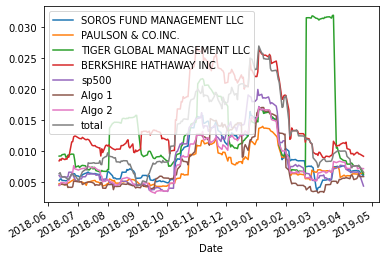

In [41]:
# Calculate rolling standard deviation
rolling_returns = allr.rolling(window=21).std()
# Plot rolling standard deviation
rolling_returns.plot()

### Calculate and plot the correlation

<AxesSubplot:>

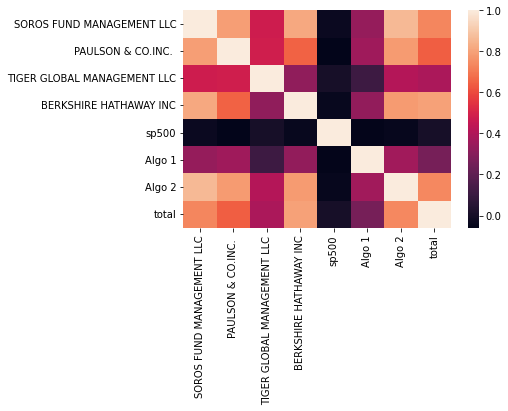

In [42]:
# Calculate and plot the correlation
returns_corr=allr.corr()
sns.heatmap(returns_corr)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of total'}, xlabel='Date'>

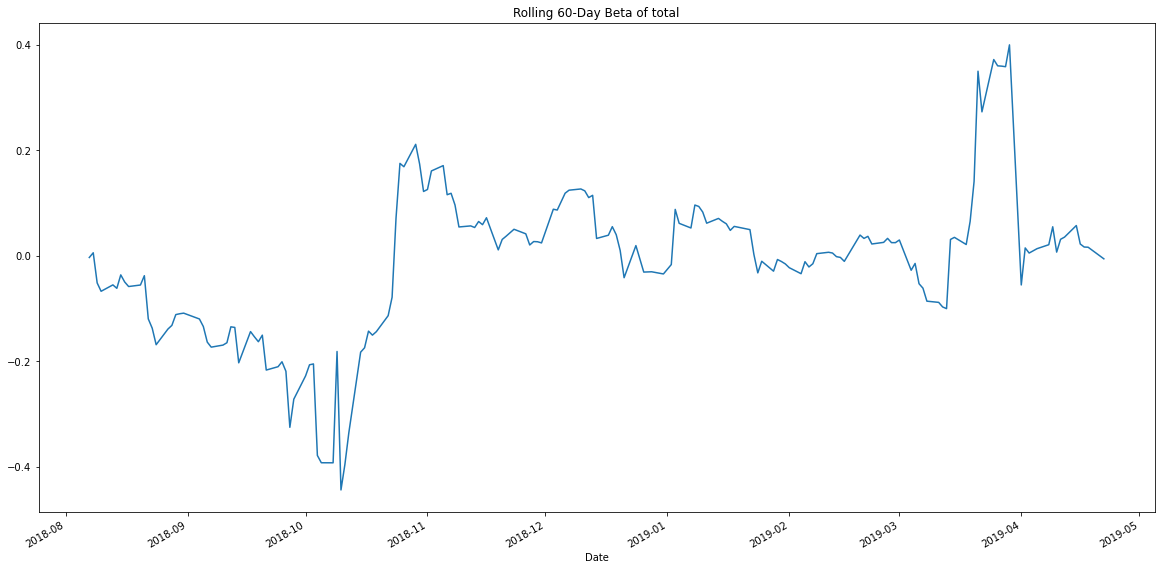

In [43]:
# Calculate and plot Beta
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_covariance = allr['total'].rolling(window=60).cov(allr['sp500'])


# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_variance = allr['sp500'].rolling(window=60).var()


 # Calculate 30-day rolling beta of MSFT and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of total') 

In [44]:
allr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2,total
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.006889,0.000915,0.001635,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.004044,-0.001135,-0.001139,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,0.000857,-0.002326,0.003341,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,0.002639,-0.006949,0.005205,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,-0.007333,0.002557,-0.002496,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228,0.009292


In [45]:
# Calculate Annualized Sharpe Ratios
allr_sharp = (allr.mean() * 252) / (allr.std() * np.sqrt(252))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

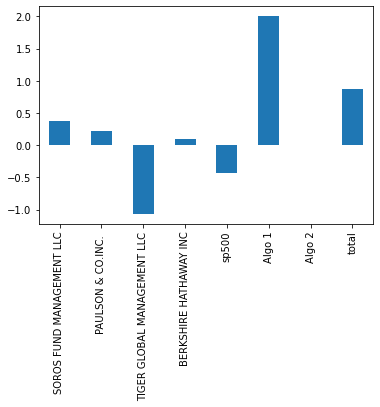

In [46]:
# Visualize the sharpe ratios as a bar plot
allr_sharp.plot.bar()

### How does your portfolio do?

Write your answer here! Algo one does much better than the s&p500 Tiger global did alright, and berkshire did the worst.